## 3UTQ 

In [1]:
import sys
sys.path.append("..")


In [2]:
import numpy as np
import os



In [3]:
from run_pipeline import run_pipeline


In [4]:
xtc_file = "../data/Proteins/3UTQ/3UTQ_replica_0.xtc"
pdb_file = "../data/Proteins/3UTQ/3UTQ.pdb"

atom_selection = "name N or name CA or name C or name O"
out_dir = "../results"

latent_dim = 8
epochs = 100
batch_size = 64
kl_beta = 1e-3


In [5]:
history = run_pipeline(
    xtc_file=xtc_file,
    pdb_file=pdb_file,
    atom_selection=atom_selection,
    out_dir=out_dir,
    latent_dim=latent_dim,
    epochs=epochs,
    batch_size=batch_size,
    kl_beta=kl_beta,
    device="cuda"
)


[INFO] Frames: 1001, Atoms: 1544

[RUN] Early fraction = 0.1
[Epoch 000] train_recon=1.1433 train_kl=2.3957 | val_recon=1.1539 val_kl=2.7673 beta=0.00e+00
[Epoch 001] train_recon=1.0310 train_kl=2.4975 | val_recon=1.0677 val_kl=2.4601 beta=1.67e-05
[Epoch 002] train_recon=0.9738 train_kl=2.7014 | val_recon=0.9407 val_kl=3.6834 beta=3.33e-05
[Epoch 003] train_recon=0.8239 train_kl=3.8157 | val_recon=0.8191 val_kl=4.8923 beta=5.00e-05
[Epoch 004] train_recon=0.7778 train_kl=4.8273 | val_recon=0.7722 val_kl=5.7236 beta=6.67e-05
[Epoch 005] train_recon=0.7180 train_kl=5.6041 | val_recon=0.7705 val_kl=6.4255 beta=8.33e-05
[Epoch 006] train_recon=0.7303 train_kl=6.2031 | val_recon=0.7222 val_kl=6.8578 beta=1.00e-04
[Epoch 007] train_recon=0.6759 train_kl=6.7820 | val_recon=0.7158 val_kl=7.3962 beta=1.17e-04
[Epoch 008] train_recon=0.6783 train_kl=7.2634 | val_recon=0.7236 val_kl=8.0125 beta=1.33e-04
[Epoch 009] train_recon=0.6607 train_kl=7.8587 | val_recon=0.7022 val_kl=8.6035 beta=1.50e-04

In [7]:
from analysis.outputs import *

In [16]:
os.chdir("/home/dilara/dilara_thesis/project/results/fraction_10")

In [19]:
history_10 = np.load("history.npy", allow_pickle=True).item()


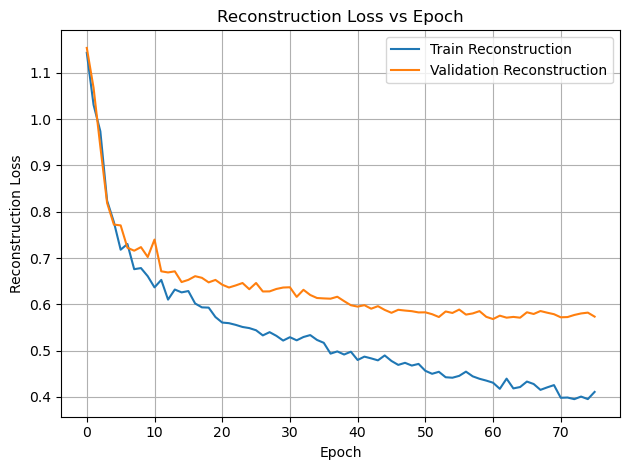

In [ ]:
recon_loss(history_10)

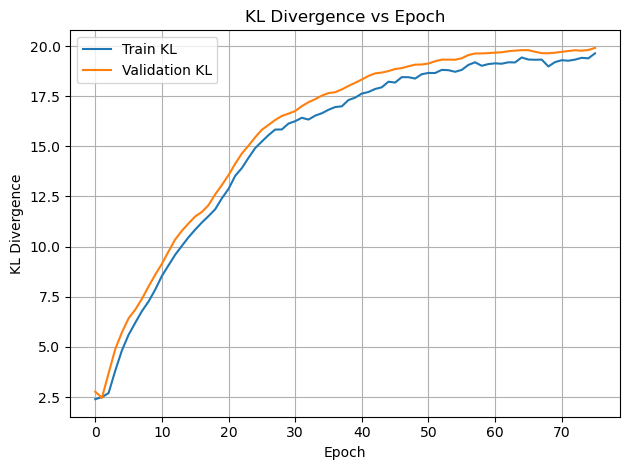

In [21]:
kl_divergence(history_10)

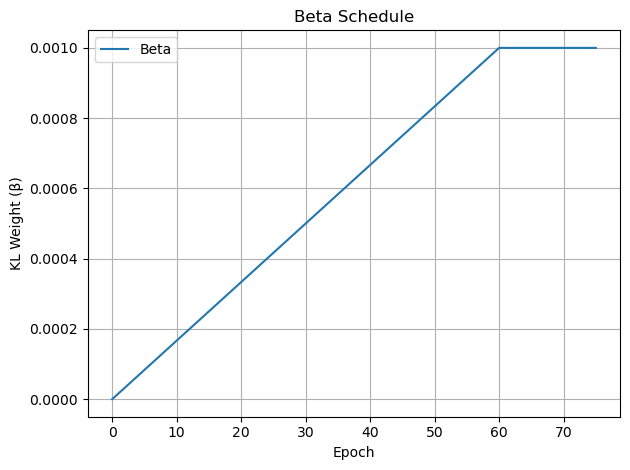

In [22]:
beta(history_10)

In [23]:
os.chdir("/home/dilara/dilara_thesis/project/results/fraction_20")


In [24]:
history_20 = np.load("history.npy", allow_pickle=True).item()

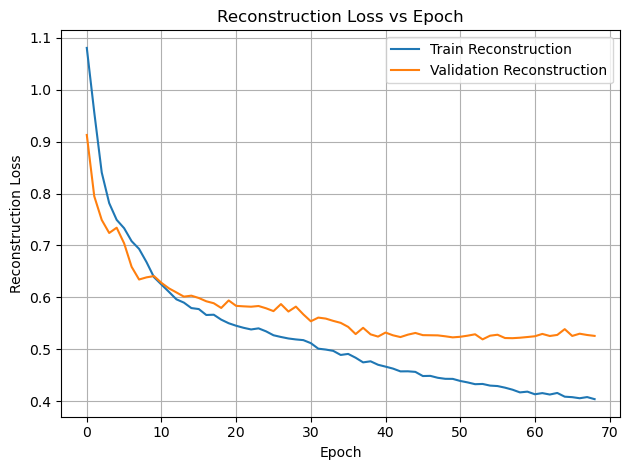

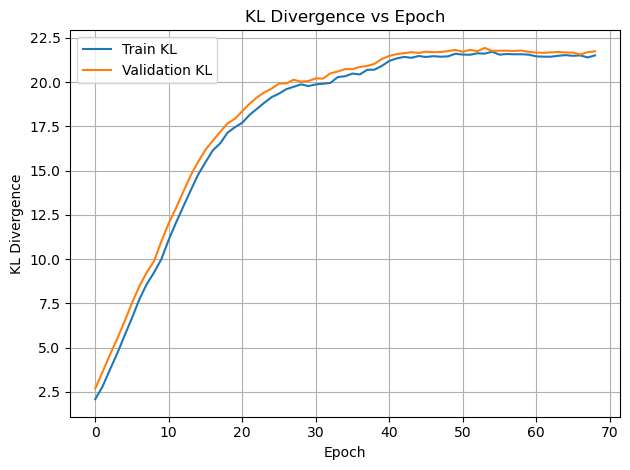

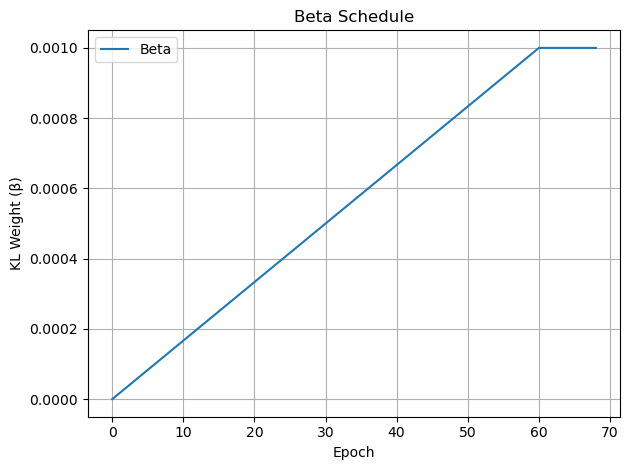

In [25]:
recon_loss(history_20)
kl_divergence(history_20)
beta(history_20)

In [26]:
os.chdir("/home/dilara/dilara_thesis/project/results/fraction_40")
history_40 = np.load("history.npy", allow_pickle=True).item()

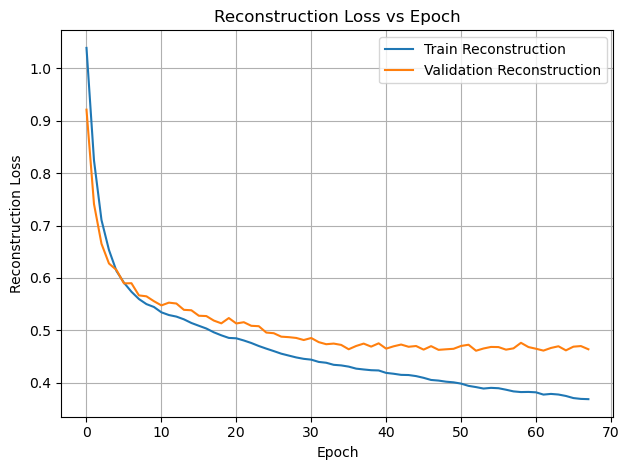

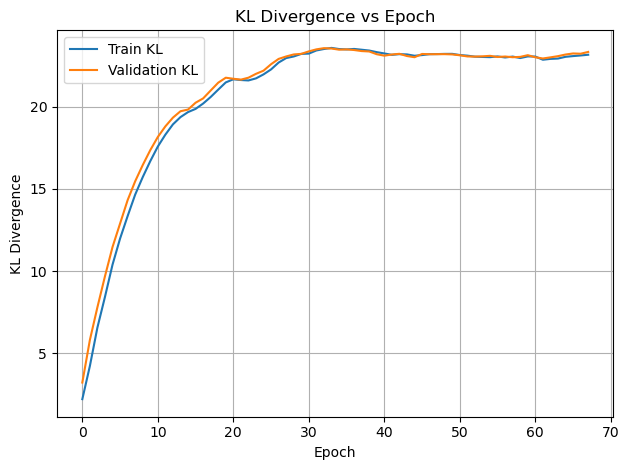

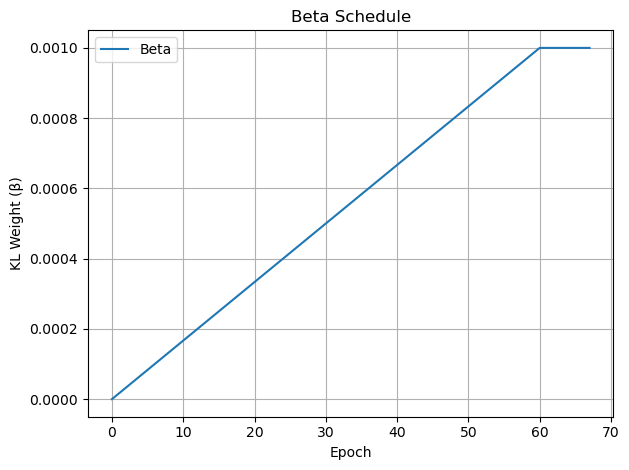

In [27]:
recon_loss(history_40)
kl_divergence(history_40)
beta(history_40)

In [28]:
os.chdir("/home/dilara/dilara_thesis/project/results/fraction_60")
history_60 = np.load("history.npy", allow_pickle=True).item()

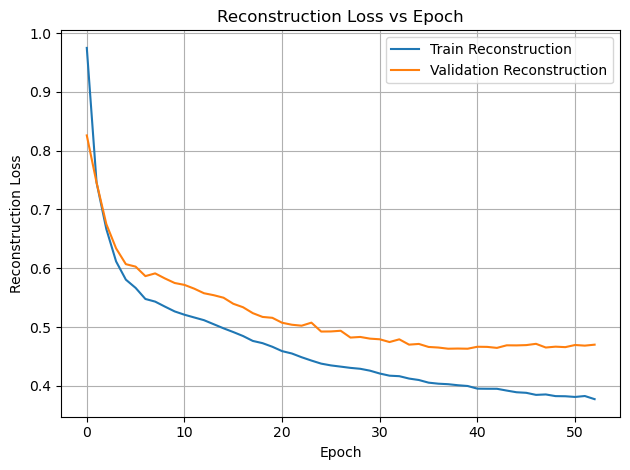

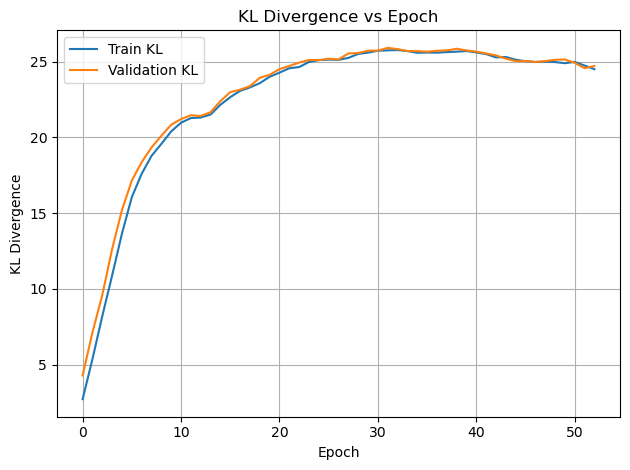

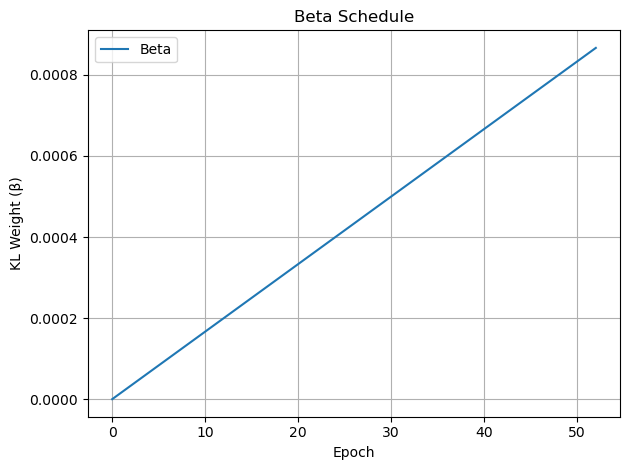

In [29]:
recon_loss(history_60)
kl_divergence(history_60)
beta(history_60)

In [2]:
fractions = [0.1, 0.2, 0.4, 0.6]
best_val_recon = [
    0.5682,
    0.5191,
    0.4609,
    0.4631
    ]
best_epoch = [
    60,
    53,
    52,
    37
]

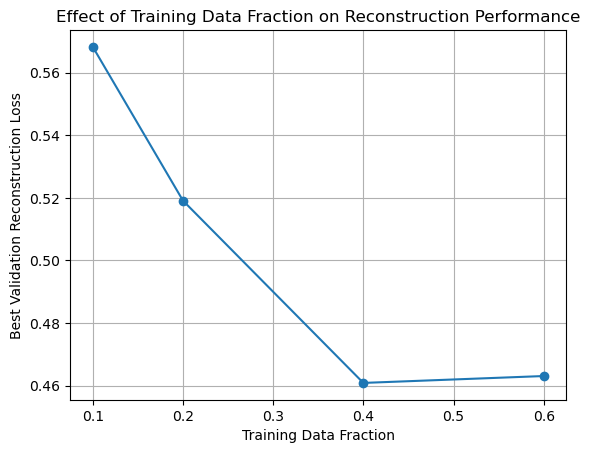

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fractions, best_val_recon, marker='o')
plt.xlabel("Training Data Fraction")
plt.ylabel("Best Validation Reconstruction Loss")
plt.title("Effect of Training Data Fraction on Reconstruction Performance")
plt.grid(True)
plt.show()


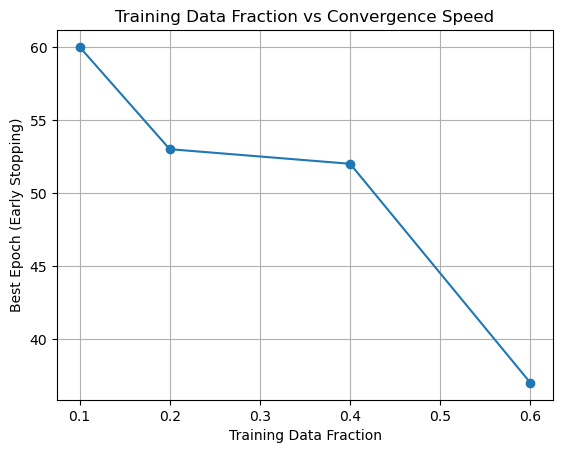

In [4]:
plt.figure()
plt.plot(fractions, best_epoch, marker='o')
plt.xlabel("Training Data Fraction")
plt.ylabel("Best Epoch (Early Stopping)")
plt.title("Training Data Fraction vs Convergence Speed")
plt.grid(True)
plt.show()
